# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# OpenWeatherMap API Key
api_key = "68e5bb3ba8ad9aae2e97ddfaa81ed940"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Add base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

city = 'london'
units = 'imperial'
api_key = '68e5bb3ba8ad9aae2e97ddfaa81ed940'
final_url = f"{url}appid={api_key}&units={units}&q="
final_url


'https://api.openweathermap.org/data/2.5/weather?appid=68e5bb3ba8ad9aae2e97ddfaa81ed940&units=imperial&q='

In [5]:
response = requests.get(final_url + city)
weather_json = response.json()
weather_json

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 61.2,
  'feels_like': 57.96,
  'temp_min': 60.01,
  'temp_max': 63,
  'pressure': 1018,
  'humidity': 72},
 'visibility': 10000,
 'wind': {'speed': 6.93, 'deg': 210},
 'clouds': {'all': 81},
 'dt': 1599069545,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1599023726,
  'sunset': 1599072313},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
weather = []
counter = 0
for city in cities:
    # Build query URL and request your results in Celsius
    final_url = f"{url}appid={api_key}&units={units}&q="
    
    # Get weather data
    weather_response = requests.get(final_url+city)
    weather_json = weather_response.json()
    
    try:
        current_dict = {
                        "City": weather_json["name"],
                        "Cloudiness": weather_json["clouds"]["all"],
                        "Country": weather_json["sys"]["country"],
                        "Date": weather_json["dt"],
                        "Humidity": weather_json["main"]["humidity"],
                        "Lat": weather_json["coord"]["lat"],
                        "Lon": weather_json["coord"]["lon"],
                        "Max Temp": weather_json["main"]["temp_max"],
                        "Wind Speed": weather_json["wind"]["speed"]
        }
                      
        weather.append(current_dict)
        counter = counter + 1
        print(f"{counter} The weather in the city of {weather_json['name']} is city id {weather_json['id']}")
    except:
       
        print(f" Weather for the city of {city} is not found")
            

1 The weather in the city of Mayor Pablo Lagerenza is city id 3867427
2 The weather in the city of Yellowknife is city id 6185377
3 The weather in the city of Mount Isa is city id 2065594
4 The weather in the city of Mogok is city id 1308937
5 The weather in the city of Nikolskoye is city id 546105
6 The weather in the city of Hermanus is city id 3366880
7 The weather in the city of Punta Arenas is city id 3874787
 Weather for the city of taolanaro is not found
8 The weather in the city of Busselton is city id 2075265
9 The weather in the city of Jamestown is city id 5122534
 Weather for the city of tumannyy is not found
10 The weather in the city of Laas is city id 3175096
11 The weather in the city of Thompson is city id 6165406
12 The weather in the city of Ushuaia is city id 3833367
13 The weather in the city of Albany is city id 5106841
14 The weather in the city of Clyde River is city id 5924351
15 The weather in the city of Shamkhal is city id 495893
16 The weather in the city o

129 The weather in the city of Bolu Province is city id 750510
130 The weather in the city of Saldanha is city id 3361934
131 The weather in the city of Harper is city id 2276492
132 The weather in the city of San Cristobal is city id 3628473
133 The weather in the city of Omboué is city id 2396853
134 The weather in the city of Raudeberg is city id 3146487
135 The weather in the city of Mikhaylovka is city id 527012
136 The weather in the city of Ostrovnoy is city id 556268
137 The weather in the city of Olafsvik is city id 3414079
138 The weather in the city of San Patricio is city id 3985168
139 The weather in the city of Pisco is city id 3932145
140 The weather in the city of Voi is city id 178522
141 The weather in the city of Mīrābād is city id 1133310
142 The weather in the city of Hualmay is city id 3939761
143 The weather in the city of Esperance is city id 2071860
144 The weather in the city of Kloulklubed is city id 7671223
145 The weather in the city of Qaanaaq is city id 3

257 The weather in the city of Bahía Blanca is city id 3865086
258 The weather in the city of Meadow Lake is city id 5478673
259 The weather in the city of Saint Paul is city id 5045360
260 The weather in the city of Dobrić is city id 3201946
261 The weather in the city of Bandarbeyla is city id 64814
262 The weather in the city of Riohacha is city id 3670745
263 The weather in the city of Sorong is city id 1626542
 Weather for the city of amderma is not found
264 The weather in the city of Mar del Plata is city id 3430863
265 The weather in the city of Hasaki is city id 2112802
266 The weather in the city of Ixtapa is city id 4004293
 Weather for the city of alotau is not found
267 The weather in the city of Lesnoy is city id 6853140
 Weather for the city of illoqqortoormiut is not found
268 The weather in the city of Tobol is city id 1518139
 Weather for the city of axixa do tocantins is not found
269 The weather in the city of Sabang is city id 1214026
270 The weather in the city of

384 The weather in the city of Gofitskoye is city id 560852
385 The weather in the city of Muyezerskiy is city id 524100
386 The weather in the city of Oistins is city id 3373652
387 The weather in the city of ‘Āhuimanu is city id 5856516
388 The weather in the city of Dakar is city id 2253354
389 The weather in the city of Mariehamn is city id 3041732
390 The weather in the city of Wolgast is city id 2806501
391 The weather in the city of Champerico is city id 3598787
392 The weather in the city of Yumen is city id 1528998
393 The weather in the city of Mendoza is city id 3844421
394 The weather in the city of Mosquera is city id 3674292
395 The weather in the city of Japura is city id 1642773
396 The weather in the city of Dingle is city id 1714733
397 The weather in the city of Edremit is city id 315985
398 The weather in the city of Chāndbāli is city id 1274761
399 The weather in the city of Xingyi is city id 1787599
400 The weather in the city of Nacala is city id 1035025
401 The 

 Weather for the city of meyungs is not found
513 The weather in the city of Zhezkazgan is city id 1516589
514 The weather in the city of Los Llanos de Aridane is city id 2514651
515 The weather in the city of Marquette is city id 5000950
516 The weather in the city of Yangambi is city id 203717
517 The weather in the city of Srednekolymsk is city id 2121025
518 The weather in the city of Tazmalt is city id 2477537
519 The weather in the city of Mnogovershinnyy is city id 2019935
520 The weather in the city of Victor Harbor is city id 2059470
521 The weather in the city of Aklavik is city id 5882953
522 The weather in the city of Bongandanga is city id 218229
523 The weather in the city of Puerto Carreño is city id 3671519
524 The weather in the city of Sabha is city id 2212775
525 The weather in the city of Sept-Îles is city id 6144312
526 The weather in the city of Adrian is city id 4983811
527 The weather in the city of Inverell is city id 2162662
528 The weather in the city of Libe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create data frame and print results
city_df = pd.DataFrame(weather)
city_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
563,Razdolinsk,63,RU,1599070573,97,58.42,94.67,49.73,6.87
564,Novaya Ladoga,66,RU,1599070573,80,60.10,32.30,55.99,10.60
565,Bogorodskoye,0,RU,1599070347,86,56.55,37.88,54.19,7.31
566,Diapaga,95,BF,1599070574,89,12.07,1.79,76.82,3.96
567,Eenhana,25,NA,1599070574,12,-17.47,16.33,82.40,2.24


In [8]:
#Export data file
city_df.to_csv("city_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
count,568.000000,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000
mean,50.478873,1.599070e+09,69.688380,21.856444,20.361989,68.101496,8.442500
std,38.137451,8.394001e+01,22.268121,33.259915,90.918890,15.366745,5.834481
min,0.000000,1.599070e+09,3.000000,-54.800000,-179.170000,31.280000,0.290000
25%,10.750000,1.599070e+09,59.000000,-4.997500,-58.980000,55.990000,4.470000
50%,50.000000,1.599070e+09,76.000000,27.545000,26.790000,70.865000,6.930000
75%,90.000000,1.599071e+09,87.000000,50.070000,102.272500,79.000000,11.167500
max,100.000000,1.599071e+09,100.000000,78.220000,179.320000,107.130000,51.670000


In [10]:
#  Get the indices of cities that have humidity over 100%.
city_humidity = city_df.loc[city_df["Humidity"]>100]
city_humidity

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed


As displayed by the data above, there are no cities with humidity levels above 100%.

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature')

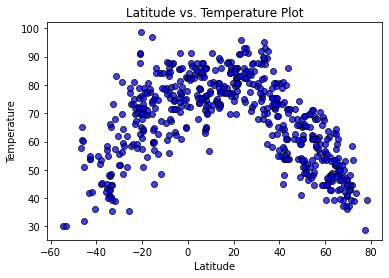

In [14]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

#Add labels
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

###### Cheyenne's Observation: The data displayed in the scatter plot indicates that temperature values are higher the closer a city is located to the equator (0° Latitude). Conversley, lower temperature value plots indicate the location of the city is either far more north (less than -20° degrees Latitude) or far more south (greater than 20° degrees Latitude)

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

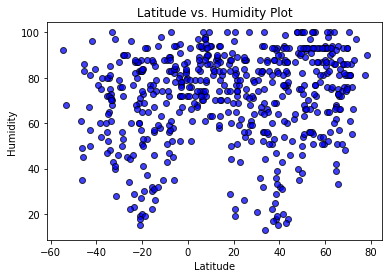

In [16]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

#Add labels
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

###### Cheyenne's Observation: Interestingly, the data in this scatter plot displays the city locations "almost" similar to the world map, but I digress. Statistically speaking, the scatter plot above indicates no relationship, however there is a pattern that's detected. Most of the humidity values indicated in the cities plotted are bound between less than 60° degree latitude and 80° degrees latitude. Additionally, humidity values less than 40% begin to sparse out between -45° degrees latitude and 65° degrees latitude.

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

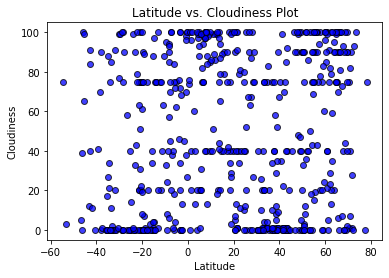

In [17]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

#Add labels
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

###### Cheyenne's Observation: The scatter plot above, Latitude vs. Cloudiness, does not indicate a specific relationship. At each documented latitude in the scatter plot, most of the cities indicated a level of cloudiness, ranging from 0% to 100%. However, it is interesting to note that at 0%, 20%, 40%, 75% and 100% Cloudiness, there are numerous cities that are plotted in a linear distribution along those levels. I'm very curious as to why the data is displayed this way.

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

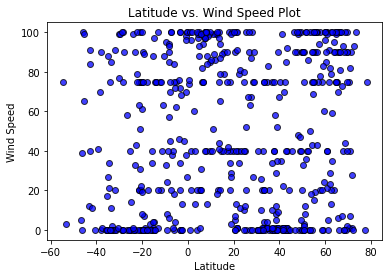

In [18]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

#Add labels
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

###### Cheyenne's Observation: Similar to the previous scatter plot, Latitude vs. Wind Speed also displays data in a similar fashion. No specific relationship is observed, however, each documented latitude in the scatter plot has wind speeds ranging from 0 to 100 mph. Also at wind speed levels of 0, 20, 40, 75, and 100 mph, there are numerous cities that are plotted in a linear distribution. \

## Linear Regression

In [17]:
#Create a dataframe for each hemisphere.
def regression_plot(x,y):
    # Calculate the correlation coefficient and linear regression model
    correlation_value = st.pearsonr(x,y)
    
    print(f" Correlation Value is {correlation_value[0]}")
    # Calculating Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")

    return line_eq 
            

    
            

In [18]:
# Create a dataframe for Northern Hemisphere and Southern Hemisphere
northern_df = city_df.loc[city_df['Lat'] >= 0]

southern_df = city_df.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 Correlation Value is -0.7874130067171577


Text(0, 0.5, 'Latitude')

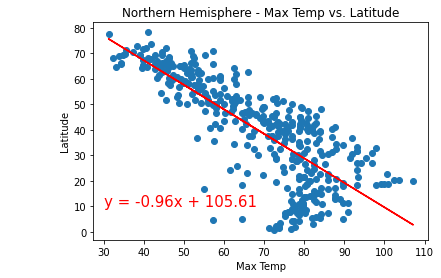

In [37]:
# Calling linear regression and passing parameters.
NHMaxTemp_df = regression_plot(northern_df["Max Temp"],northern_df["Lat"])

plt.annotate(NHMaxTemp_df,(30,10),fontsize=15,color="red")

#Add labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 Correlation Value is 0.7916488435282012


Text(0, 0.5, 'Latitude')

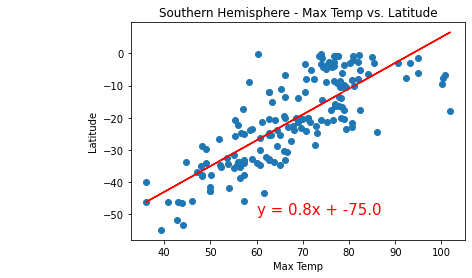

In [36]:
# Calling linear regression and passing parameters.
SHMaxTemp_df = regression_plot(southern_df["Max Temp"],southern_df["Lat"])

plt.annotate(SHMaxTemp_df,(60,-50),fontsize=15,color="red")

#Add labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Correlation Value is 0.14534514757529104


Text(0, 0.5, 'Latitude')

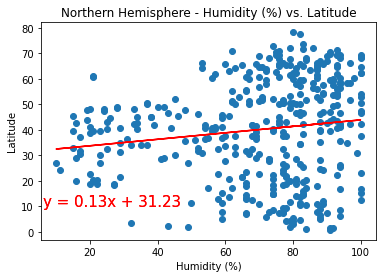

In [22]:
# Calling linear regression and passing parameters.
NHHumidity_df = regression_plot(northern_df["Humidity"],northern_df["Lat"])

plt.annotate(NHHumidity_df,(6,10),fontsize=15,color="red")

#Add labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Correlation Value is -0.023510619536372998


Text(0, 0.5, 'Latitude')

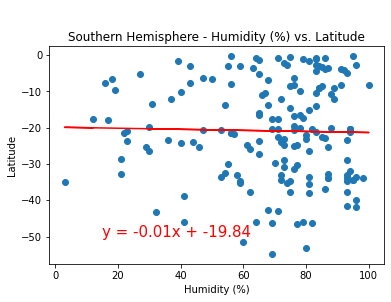

In [35]:
# Calling linear regression and passing parameters.
SHHumidity_df = regression_plot(southern_df["Humidity"],southern_df["Lat"])

plt.annotate(SHHumidity_df,(15,-50),fontsize=15,color="red")

#Add labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Correlation Value is 0.06594420372444404


Text(0, 0.5, 'Latitude')

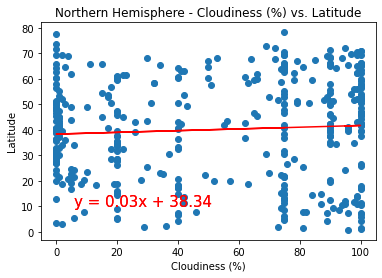

In [25]:
# Calling linear regression and passing parameters.
NHCloudy_df = regression_plot(northern_df["Cloudiness"],northern_df["Lat"])

plt.annotate(NHCloudy_df,(6,10),fontsize=15,color="red")

#Add labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Correlation Value is 0.005890047624184092


Text(0, 0.5, 'Latitude')

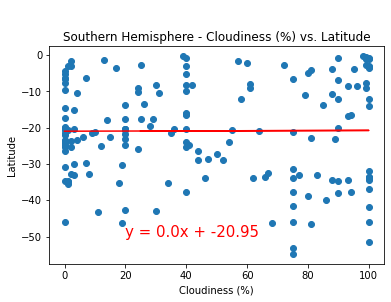

In [34]:
# Calling linear regression and passing parameters.
SHCloudy_df = regression_plot(southern_df["Cloudiness"],southern_df["Lat"])

plt.annotate(SHCloudy_df,(20,-50),fontsize=15,color="red")

#Add labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Correlation Value is 0.03035239835651642


Text(0, 0.5, 'Latitude')

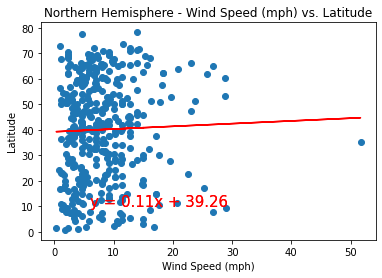

In [28]:
# Calling linear regression and passing parameters.
NHWind_df = regression_plot(northern_df["Wind Speed"],northern_df["Lat"])

plt.annotate(NHWind_df,(6,10),fontsize=15,color="red")

#Add labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Correlation Value is -0.0861627928739123


Text(0, 0.5, 'Latitude')

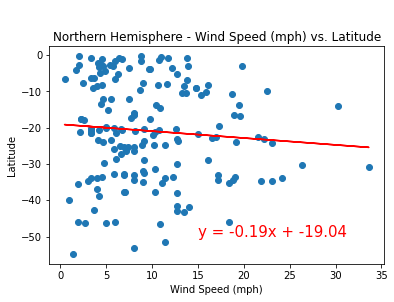

In [33]:
# Calling linear regression and passing parameters.
SHWind_df = regression_plot(southern_df["Wind Speed"],southern_df["Lat"])

plt.annotate(SHWind_df,(15,-50),fontsize=15,color="red")

#Add labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')